In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

In [2]:
import random
import deap
from deap import base
from deap import creator
from deap import tools

D:\anaconda\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [73]:
# Number of locations, parts, time steps, and possible quantities respectively
m = 3    # number of locations
h = 3    # number of parts
n = 10    # number of time steps
k = 5     # number of quantities

# Set of possible Locations (L), Parts (P), Time steps (T), and Quantities (Q)
L = list(np.arange(m))
P = list(np.arange(h))
T = list(np.arange(n))
#Q = list(np.arange(k))

# Index set of individuals, J
#j_max = 100     # max number of individuals we want to start out with
#J = np.arange(j_max)


In [74]:
# Individuals [Matrix]
# Creating a random sample of inviduals
Q = np.array([np.array([np.random.randint(0,k) for a in T]) for b in L])
Q_IJ = np.array([Q for a in J])    # an example population


In [131]:
def indiv(k):
    return np.array([np.array([np.random.randint(0,k) for a in T]) for b in L]).reshape(m*n)


In [132]:
def evalOneMax(individual):
    target = 5
    dist = abs(sum(individual)-sum(5*np.ones(len(individual))))/sum(5*np.ones(len(individual)))
    return  dist

In [133]:
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [134]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", indiv, 14)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [135]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=2)

In [112]:


def main():
    pop = toolbox.population(n=50)
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 0.4, 0.1
    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while max(fits) < 100 and g < 1000:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
       # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        pop[:] = offspring

    # Gather all the fitnesses in one list and print the stats
    fits = [ind.fitness.values[0] for ind in pop]

    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2 / length - mean**2)**0.5

    plt.figure(figsize = (10,7))
    plt.plot(np.arange(len(fits)), fits)
    plt.show()
    print("  Min %s" % min(fits))
    print("  Max %s" % max(fits))
    print("  Avg %s" % mean)
    print("  Std %s" % std)
    return pop

In [113]:
main()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

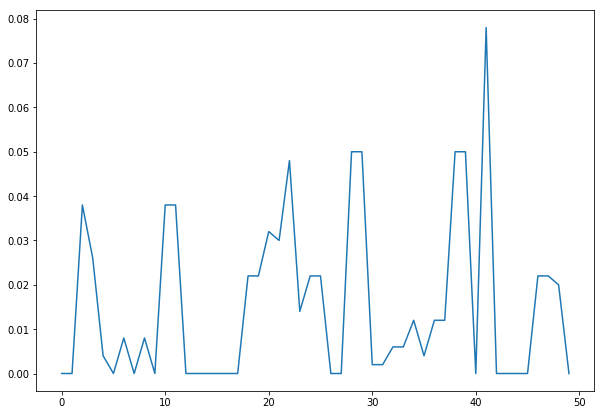

  Min 0.0
  Max 0.078
  Avg 0.015400000000000002
  Std 0.01877977635649583


In [107]:
pop = toolbox.population(n=50)
# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit
# CXPB  is the probability with which two individuals
#       are crossed
#
# MUTPB is the probability for mutating an individual
CXPB, MUTPB = 0.4, 0.1
# Extracting all the fitnesses of 
fits = [ind.fitness.values[0] for ind in pop]
# Variable keeping track of the number of generations
g = 0

# Begin the evolution
while max(fits) < 100 and g < 500:
    # A new generation
    g = g + 1
    #print("-- Generation %i --" % g)
    # Select the next generation individuals
    offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))
   # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    pop[:] = offspring

# Gather all the fitnesses in one list and print the stats
fits = [ind.fitness.values[0] for ind in pop]

length = len(pop)
mean = sum(fits) / length
sum2 = sum(x*x for x in fits)
std = abs(sum2 / length - mean**2)**0.5

plt.figure(figsize = (10,7))
plt.plot(np.arange(len(fits)), fits)
plt.show()
print("  Min %s" % min(fits))
print("  Max %s" % max(fits))
print("  Avg %s" % mean)
print("  Std %s" % std)


In [61]:
dist = abs(sum(individual)-sum(5*np.ones(len(individual))))/sum(5*np.ones(len(individual)))


[array([0, 0, 1, 2, 9, 4, 1, 6, 5, 2, 5, 7, 7, 9, 1, 1, 0, 1, 9, 2, 2, 4,
        9, 9, 8, 8, 6, 3, 3, 2]),
 array([0, 3, 5, 4, 2, 0, 8, 8, 5, 0, 5, 8, 3, 7, 9, 2, 1, 4, 3, 2, 7, 3,
        1, 4, 5, 0, 7, 8, 5, 9]),
 array([0, 7, 7, 2, 6, 4, 5, 0, 9, 4, 6, 8, 9, 3, 2, 3, 5, 0, 5, 9, 5, 9,
        3, 6, 0, 2, 2, 0, 6, 1]),
 array([0, 7, 7, 2, 6, 4, 5, 0, 9, 4, 6, 8, 9, 3, 2, 3, 5, 0, 5, 9, 5, 9,
        3, 6, 0, 2, 2, 0, 6, 1]),
 array([0, 7, 7, 2, 6, 4, 5, 0, 9, 4, 6, 8, 9, 3, 2, 3, 5, 0, 5, 9, 5, 9,
        3, 6, 0, 2, 2, 0, 6, 1]),
 array([0, 0, 1, 2, 9, 4, 1, 6, 5, 2, 5, 7, 7, 9, 1, 1, 0, 1, 9, 2, 2, 4,
        9, 9, 8, 8, 6, 3, 3, 2]),
 array([0, 7, 3, 0, 0, 1, 2, 4, 2, 3, 2, 5, 9, 3, 0, 0, 1, 7, 5, 7, 2, 5,
        8, 6, 0, 8, 4, 8, 3, 6]),
 array([0, 6, 3, 8, 9, 1, 4, 1, 1, 4, 8, 0, 7, 6, 1, 2, 5, 5, 1, 8, 5, 6,
        0, 1, 1, 4, 0, 9, 3, 6]),
 array([0, 9, 0, 9, 4, 1, 6, 6, 9, 1, 1, 2, 6, 4, 3, 0, 3, 1, 7, 3, 3, 2,
        7, 0, 4, 9, 2, 8, 9, 8]),
 array([0, 7, 3, 0, 0, 1, 2,

In [128]:
#def main():
from deap import algorithms
import array

In [136]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [142]:


pop = toolbox.population(n=300)
#hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, stats=stats, verbose=True)
#pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                               #stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	std     	min  	max  
0  	300   	0.298413	0.078064	0.072	0.552


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()